In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from datetime import datetime
from datetime import date
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import scipy.stats
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot_polygon(ax, sub_region):
    """
    https://groups.google.com/forum/#!topic/scitools-iris/LxR0EbQolyE
    Note:
    ----
    order is important:
        lower-left, upper-left, upper-right, lower-right
        2 -- 3
        |    |
        1 -- 4
    """
    # ax = fig.axes[0]
    lons = [sub_region.latmin, sub_region.latmin, sub_region.latmax, sub_region.latmax]
    lats = [sub_region.lonmin, sub_region.lonmax, sub_region.lonmax, sub_region.lonmin]
    ring = LinearRing(list(zip(lons, lats)))
    ax.add_geometries([ring], cartopy.crs.PlateCarree(), facecolor='b', edgecolor='black', alpha=0.5)
    return ax

def plot_GPI(GPI,latS,latN,lonW,lonE):
 
    import cartopy.crs as ccrs
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker
    import cartopy.feature as cfeature
    from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter

    from geocat.viz import util as gvutil
    from shapely.geometry.polygon import LinearRing

    minlon =  -120.
    maxlon =   -10.
    minlat =   0.
    maxlat =   30.

    
    minC = 0
    maxC = 60.0 #100
    intC = 5  #10
   
    levC = int((maxC-minC)/intC) + 1

# Generate figure (set its size (width, height) in inches)
    fig = plt.figure(figsize=(24, 6))

# Generate axes, using Cartopy, drawing coastlines, and adding features
    projection = ccrs.PlateCarree()

    ax = plt.axes(projection=projection)
    ax.coastlines(linewidths=0.5)
    ax.add_feature(cfeature.LAND, facecolor='lightgray')

    # Import an NCL colormap
    #newcmp = gvcmaps.BlAqGrYeOrRe
    newcmp = 'YlOrBr'  #'YlGn' #'coolwarm'  #gvcmaps.ncl_default
    #newcmp = gvcmaps.BlAqGrYeOrRe
# Contourf-plot data

    contourLevels = np.arange(minC, maxC, intC)
    vmaxMap = GPI.plot.contourf(ax=ax,
                          transform=projection,
                          vmin=minC,
                          vmax=maxC,
                          levels=contourLevels,
                          cmap=newcmp,
                          add_colorbar=False)

    gvutil.set_axes_limits_and_ticks(ax,
                                     xlim=(minlon, maxlon),
                                     ylim=(minlat, maxlat),
                                     xticks=np.linspace(minlon, maxlon, 6),
                                     yticks=np.linspace(minlat, maxlat,3))

     # Use geocat.viz.util convenience function to add minor and major tick lines
    gvutil.add_major_minor_ticks(ax)

    # Use geocat.viz.util convenience function to make plots look like NCL plots by
    # using latitude, longitude tick labels
    gvutil.add_lat_lon_ticklabels(ax)
    # Remove the degree symbol from tick labels
    ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
    ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))
   
    
    lons = [lonW, lonW, lonE, lonE]
    lats = [latS, latN, latN, latS]
    
    print(lonW, lonE, latN, latS)
    ring = LinearRing(list(zip(lons, lats)))
    ax.add_geometries([ring], ccrs.PlateCarree(), facecolor='none', edgecolor='black')

    
    # Add colorbar
    cbar = plt.colorbar(vmaxMap, orientation='horizontal',ticks=np.arange(minC, maxC, intC))
#cbar.ax.set_yticklabels([str(i) for i in np.arange(minC, maxC, intC)])
#cbar.ax.set_yticklabels(str(conto


In [3]:


# epac 
latS = 5.
latN = 25.
lonW = 240.
lonE = 275.


./2018_EN_pyPI.nc


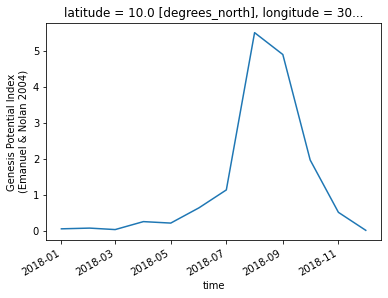

In [4]:
infile = './2018_EN_pyPI.nc'  # used tcpyPI
print(infile)
ds  = xr.open_dataset(infile) 

ds.GPI.sel(latitude=10,longitude=300).plot()

A = ds.GPI.sel(latitude=10,longitude=300)

GPI =  7.878279006945377e-08 67.94599914550781


ERROR 1: PROJ: proj_create_from_database: Open of /glade/u/apps/opt/conda/envs/npl-2022b/share/proj failed


-120.0 -85.0 25.0 5.0


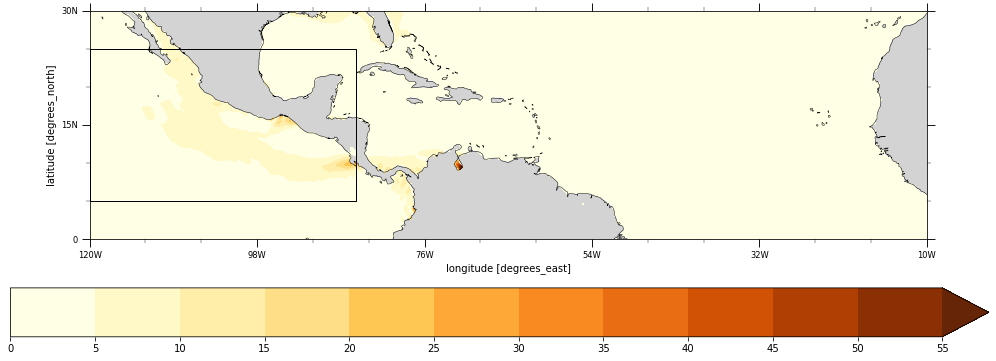

In [5]:
gpiMean = ds.GPI.mean(dim='time')

print("GPI = " , gpiMean.min().values, gpiMean.max().values)

plot_GPI(gpiMean,latS,latN,lonW-360.,lonE-360.)

./2018_EN.nc


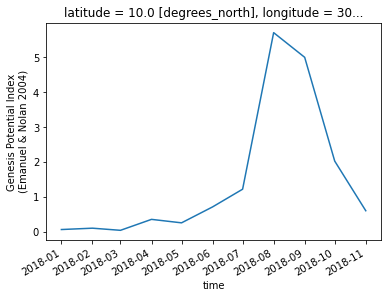

In [6]:
infile = './2018_EN.nc' # calculated using pcmod
print(infile)
ds  = xr.open_dataset(infile) 
ds.GPI.sel(latitude=10,longitude=300).plot()
B=ds.GPI.sel(latitude=10,longitude=300)

GPI =  5.567570582343251e-08 89.2750015258789
-120.0 -85.0 25.0 5.0


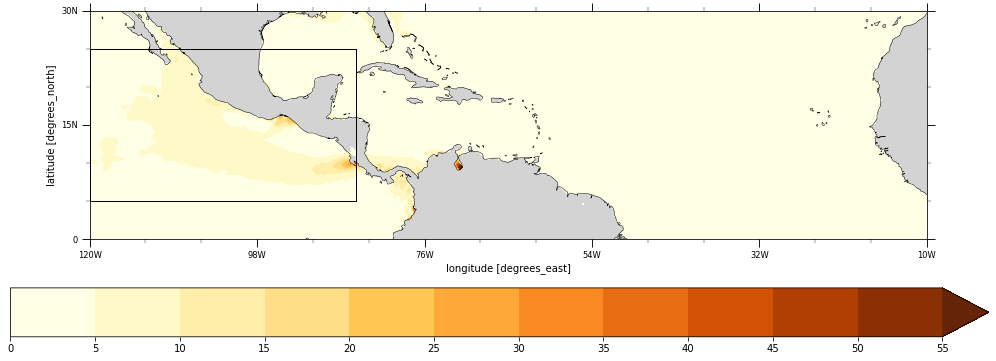

In [7]:
gpiMean = ds.GPI.mean(dim='time')

print("GPI = " , gpiMean.min().values, gpiMean.max().values)

plot_GPI(gpiMean,latS,latN,lonW-360.,lonE-360.)

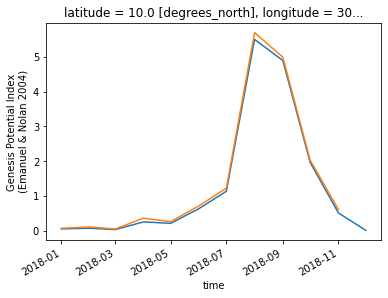

In [8]:
A.plot()
B.plot()